<a href="https://colab.research.google.com/github/anandhuarjuna/project1/blob/main/Bank_Complaints_NLP%20Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Data Set**

In [88]:
from numpy import NaN
import pandas as pd
df=pd.read_csv('/content/complaints_processed.csv',nrows=3000)


**Drop irrelvant columns**

In [89]:
df = df.drop(df.columns[0], axis=1)

**Check null values**

In [90]:
df.isna().sum()

product      0
narrative    1
dtype: int64

**Drop rows with null values**

In [91]:
df=df[df['narrative'].notna()]
df.isna().sum()

product      0
narrative    0
dtype: int64

**Countplot of feature labels**

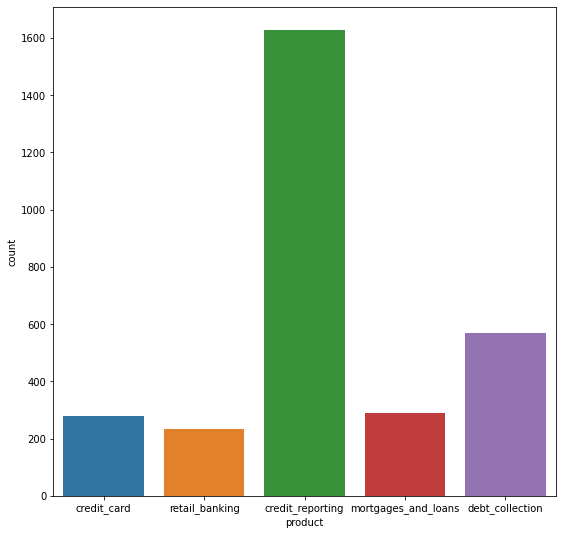

In [92]:
import warnings
warnings.filterwarnings('ignore')
df['product'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
import seaborn as sns
sns.countplot(df['product'])

**Remap labels**
**from objects to integers**

In [93]:
df['product']=df['product'].map({'credit_card':0,'retail_banking':1,'credit_reporting':2,'mortgages_and_loans':3,'debt_collection':4})
df['product'].value_counts()

2    1627
4     570
3     289
0     278
1     235
Name: product, dtype: int64

**Remove special characters**

In [94]:
message=df.narrative
message=message.str.replace('[^a-zA-Z0-9]+',' ')
message

0       purchase order day shipping amount receive pro...
1       forwarded message date tue subject please inve...
2       forwarded message cc sent friday pdt subject f...
3       payment history missing credit report speciali...
4       payment history missing credit report made mis...
                              ...                        
2995    account name account numberxxxx account type c...
2996    account name account number reason failed veri...
2997    account name original creditor status collecti...
2998    account name account numberxxxx account type c...
2999    account name account namestate farm bank accou...
Name: narrative, Length: 2999, dtype: object

**Tokenize** **-->** **stem** **-->** **lowercase** **-->** **join the words**

In [95]:
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
stem=SnowballStemmer('english')
message=message.apply(lambda x:[stem.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
message

0       purchas order day ship amount receiv product w...
1       forward messag date tue subject pleas investig...
2       forward messag cc sent friday pdt subject fina...
3       payment histori miss credit report special loa...
4       payment histori miss credit report made mistak...
                              ...                        
2995    account name account numberxxxx account type c...
2996    account name account number reason fail verifi...
2997    account name origin creditor status collect ac...
2998    account name account numberxxxx account type c...
2999    account name account namest farm bank account ...
Name: narrative, Length: 2999, dtype: object

**fit & Transform**

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
train_vec=vect.fit_transform(message)
print(train_vec)

  (0, 261)	0.03145306185252639
  (0, 2720)	0.02704952269989653
  (0, 3779)	0.05950618268420057
  (0, 3139)	0.05950618268420057
  (0, 103)	0.044067533658794796
  (0, 2045)	0.06522326976512727
  (0, 104)	0.06856755132082676
  (0, 520)	0.0284200630194463
  (0, 3415)	0.07087509878555535
  (0, 689)	0.11123702921684842
  (0, 694)	0.022655527984966756
  (0, 781)	0.02432820403233156
  (0, 1838)	0.09192213335853189
  (0, 4315)	0.13284533943901608
  (0, 2944)	0.06547957390018924
  (0, 4627)	0.03529308136612153
  (0, 4827)	0.03597764105264088
  (0, 4504)	0.02442535489851529
  (0, 1465)	0.02546552388078634
  (0, 714)	0.1271208856401543
  (0, 4691)	0.03306756570457268
  (0, 4415)	0.023363169246372485
  (0, 1966)	0.025443381550226535
  (0, 3983)	0.12201994657526437
  (0, 4687)	0.0687842456634632
  :	:
  (2998, 57)	0.18653289449571084
  (2998, 3868)	0.027289917219063212
  (2998, 1138)	0.03470545775130207
  (2998, 3214)	0.07744957431161295
  (2998, 438)	0.10300857633595792
  (2998, 2624)	0.08063133035

**Feature & Target**

In [97]:
X=train_vec
y=df['product'].values

**Train Test Split**

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

**Classifiers** : SVC, MultinomialNB, RandomForestClassifier & AdaBoostClassifier

In [99]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
svc=SVC()
mb=MultinomialNB()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()


**Classification report**, **ConfusionMatrix** **&** **Predcition**

In [ ]:
lst=[svc,mb,rf,ab]
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
for i in lst:
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  y_sent=i.predict(vect.transform(['yes disputing sending publish government website also including copy driver license utility mail keep reporting updated also included copy ftc sent identity dealing issue sometime experian told identity driver license social security card found brother passed away last year document irs showing identity theft affidvat showing investigated proved identity theft letter explain see reported police tell wrong person neighborhood also wrote said fill applicant get car also attached letter mail came back return sender sent certified letter return receipt experian inquiring fair credit reporting act section required federal law verify physical verification original signed consumer contract fcra unverified account must removed credit bureau able verified proof unable provide copy verifiable proof item must removed listed attached letter sent requiring experian said verified respond yet item deleted deleted deleted experian put back without proof deleted month ago none bureau creditor collection given proof ask letter attached law item deleted proof given also veteran total check go child veteran adminstration trying get flat rent item credit report causing lot damage please help veteran']))
  print('Predicting sentence')
  if y_sent==[0]:
    print('credit_card')
  elif y_sent==[1]:
    print('retail_banking')
  elif y_sent==[2]:
    print('credit_reporting')
  elif y_sent==[3]:
    print('mortgages_and_loans')
  elif y_sent==[4]:
    print('debt_collection')
  else:
    print('doesnot belongs to any')
  print('*****************************')
  print(classification_report(y_test,y_pred))
  print('*****************************')
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


Predicting sentence
credit_reporting
*****************************
              precision    recall  f1-score   support

           0       0.77      0.58      0.66        88
           1       0.79      0.74      0.76        70
           2       0.85      0.96      0.91       485
           3       0.88      0.79      0.84        77
           4       0.88      0.74      0.80       180

    accuracy                           0.85       900
   macro avg       0.83      0.76      0.79       900
weighted avg       0.85      0.85      0.84       900

*****************************
Predicting sentence
credit_reporting
*****************************
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        88
           1       1.00      0.01      0.03        70
           2       0.56      1.00      0.72       485
           3       1.00      0.05      0.10        77
           4       0.81      0.14      0.24       180

    accuracy         